In [ ]:
"""
https://github.com/rlowd/python-bigdata/blob/master/
intro2stats/notebooks/5.%20Distributions.py3.ipynb

Distribution and Histograms
"""

In [1]:
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
weed_pd = pd.read_csv('https://raw.githubusercontent.com/rlowd/python-bigdata/master/intro2stats/data/Weed_Price.csv',
                     parse_dates = [-1])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


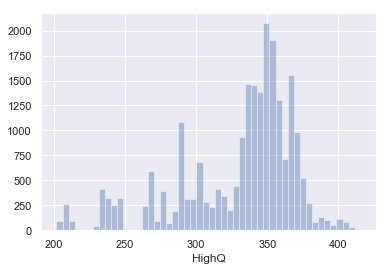

In [3]:
sns.distplot(weed_pd.HighQ, kde=False)

In [4]:
weed_pd['month'] = weed_pd['date'].apply(lambda x: x.month)
weed_pd['year'] = weed_pd['date'].apply(lambda x: x.year)

In [6]:
weed_jan2015_summarized = weed_pd.loc[(weed_pd.month==1) & (weed_pd.year==2015),
                        ['State', 'HighQ']].groupby('State').mean().reset_index()
weed_jan2015_summarized

,State,HighQ
0,Alabama,336.504839
1,Alaska,302.972581
2,Arizona,297.782903
3,Arkansas,341.705806
4,California,243.602258
5,Colorado,243.273226
6,Connecticut,336.442258
7,Delaware,363.908387
8,District of Columbia,348.107097
9,Florida,300.604194


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


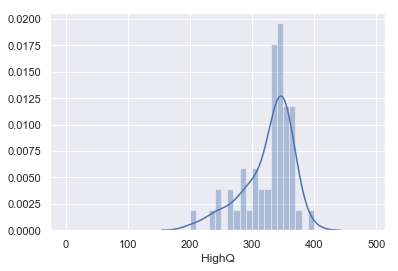

In [7]:
"""
If you randomly landed in the USA, with equal changes of landing in any of the
state, what is the probability that the price of weed is more than 340?
"""

sns.distplot(weed_jan2015_summarized.HighQ, bins=range(0, 500, 10))

In [12]:
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

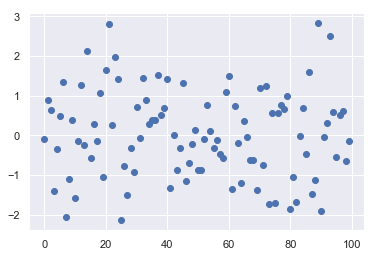

In [9]:
# Generate random numbers that are normally distributed
random_normal = sp.randn(100)
plt.scatter(range(100), random_normal)

In [10]:
print("Mean: ", random_normal.mean(), " Variance: ", random_normal.var())

Mean:  0.037028281524910577  Variance:  1.2089484779010498


In [13]:
# Creat a normal distribution with mean 2.5 and standard deviation 1.7

n = stats.norm(loc=2.5, scale=1.7)

In [14]:
# Generate a random number from the above distribution

n.rvs()

2.1102776873104054

In [15]:
# For the above normal dist. what is the pdf at 0.3?

n.pdf(0.3)

0.10157711386142985

In [17]:
# Binomial distribution with 'p' = 0.4 and number of trials = 15

stats.binom.pmf(range(15), 10, 0.4)

array([6.04661760e-03, 4.03107840e-02, 1.20932352e-01, 2.14990848e-01,
       2.50822656e-01, 2.00658125e-01, 1.11476736e-01, 4.24673280e-02,
       1.06168320e-02, 1.57286400e-03, 1.04857600e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [20]:
# Weed prices in CA for Jan 2015

weed_ca_jan2015 = weed_pd[(weed_pd.State=='California') & (weed_pd.month==1) &
                          (weed_pd.year==2015)]
weed_ca_jan2015.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
55,California,243.96,16512,189.35,19151,NaN,1096,2015-01-01,1,2015
820,California,243.95,16517,189.34,19160,NaN,1096,2015-01-02,1,2015
1534,California,243.93,16530,189.38,19179,NaN,1096,2015-01-03,1,2015
2299,California,243.91,16542,189.38,19193,NaN,1099,2015-01-04,1,2015
3064,California,243.91,16558,189.39,19222,NaN,1100,2015-01-05,1,2015


In [21]:
# Mean & Standard Deviation of the Price and High Quality weed in CA

print("Sample Mean: ", weed_ca_jan2015.HighQ.mean(), '\n',
     "Sample Standard Deviation: ", weed_ca_jan2015.HighQ.std())

Sample Mean:  243.6022580645161 
 Sample Standard Deviation:  0.21137186311363304


In [22]:
print(weed_ca_jan2015.HighQ.max(), weed_ca_jan2015.HighQ.min())

243.96 243.27
